# Clean raw data to interim data for visualizations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import os
import sys

PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
sys.path.append(os.path.join(PROJ_ROOT, 'src'))

In [3]:
print(sys.path)

['c:\\Users\\tawiwut.charuwat\\projects\\nyc_cabs_refactor\\notebooks', 'c:\\Users\\tawiwut.charuwat\\.vscode\\extensions\\ms-toolsai.jupyter-2021.9.1101343141\\pythonFiles', 'c:\\Users\\tawiwut.charuwat\\.vscode\\extensions\\ms-toolsai.jupyter-2021.9.1101343141\\pythonFiles\\lib\\python', 'C:\\Users\\tawiwut.charuwat\\Anaconda3\\envs\\ds_projects\\python38.zip', 'C:\\Users\\tawiwut.charuwat\\Anaconda3\\envs\\ds_projects\\DLLs', 'C:\\Users\\tawiwut.charuwat\\Anaconda3\\envs\\ds_projects\\lib', 'C:\\Users\\tawiwut.charuwat\\Anaconda3\\envs\\ds_projects', '', 'C:\\Users\\tawiwut.charuwat\\Anaconda3\\envs\\ds_projects\\lib\\site-packages', 'C:\\Users\\tawiwut.charuwat\\Anaconda3\\envs\\ds_projects\\lib\\site-packages\\win32', 'C:\\Users\\tawiwut.charuwat\\Anaconda3\\envs\\ds_projects\\lib\\site-packages\\win32\\lib', 'C:\\Users\\tawiwut.charuwat\\Anaconda3\\envs\\ds_projects\\lib\\site-packages\\Pythonwin', 'C:\\Users\\tawiwut.charuwat\\Anaconda3\\envs\\ds_projects\\lib\\site-packages\\IP

In [4]:
from data.read import read_raw_data

In [5]:
from visualization.exploratory import outlier_viz

In [6]:
from data.preprocess import (
    drop_zero_records,
    drop_minmax,
    drop_statistical_outliers,
    NYC_MIN_LON, NYC_MAX_LON, NYC_MIN_LAT, NYC_MAX_LAT
)

# Read raw data

In [13]:
df = read_raw_data('../data/raw/train.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


# Visualize numeric features to detect outliers and weird values

          vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01

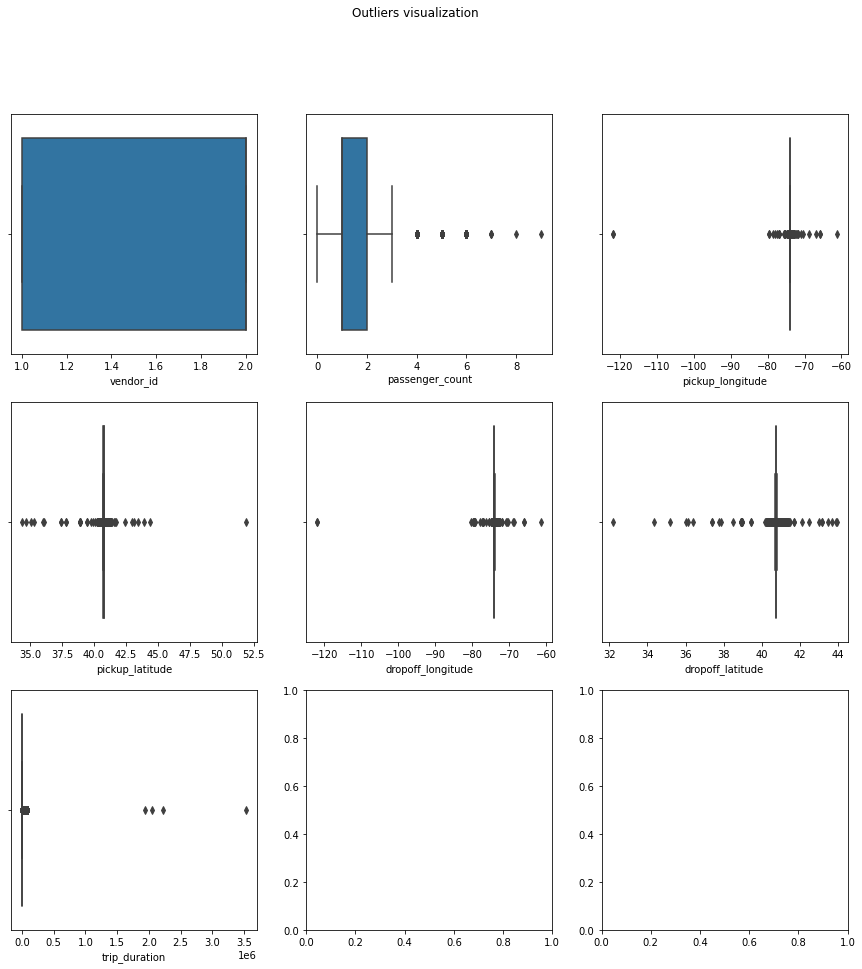

In [15]:
# Visualize numeric features to see outliers
fig = outlier_viz(df)

In [16]:
# remove zero passenger
df = drop_zero_records(df, ['passenger_count'])

In [17]:
# remove outlying by min max
df = drop_minmax(df, 'pickup_latitude', NYC_MIN_LAT, NYC_MAX_LAT)
df = drop_minmax(df, 'pickup_longitude', NYC_MIN_LON, NYC_MAX_LON)
df = drop_minmax(df, 'dropoff_latitude', NYC_MIN_LAT, NYC_MAX_LAT)
df = drop_minmax(df, 'dropoff_longitude', NYC_MIN_LON, NYC_MAX_LON)

In [18]:
# remove statistical outliers
df = drop_statistical_outliers(df)

          vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.329780e+06     1.329780e+06      1.329780e+06     1.329780e+06   
mean   1.517506e+00     1.513474e+00     -7.397821e+01     4.075335e+01   
std    4.996936e-01     1.057143e+00      2.440571e-02     2.262520e-02   
min    1.000000e+00     1.000000e+00     -7.408286e+01     4.066645e+01   
25%    1.000000e+00     1.000000e+00     -7.399219e+01     4.073890e+01   
50%    2.000000e+00     1.000000e+00     -7.398212e+01     4.075490e+01   
75%    2.000000e+00     2.000000e+00     -7.396890e+01     4.076866e+01   
max    2.000000e+00     5.000000e+00     -7.385874e+01     4.083546e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.329780e+06      1.329780e+06   1.329780e+06  
mean       -7.397712e+01      4.075322e+01   7.618881e+02  
std         2.277565e-02      2.682154e-02   5.346050e+02  
min        -7.408079e+01      4.065460e+01   1.000000e+00  
25%        -7.399153e+01

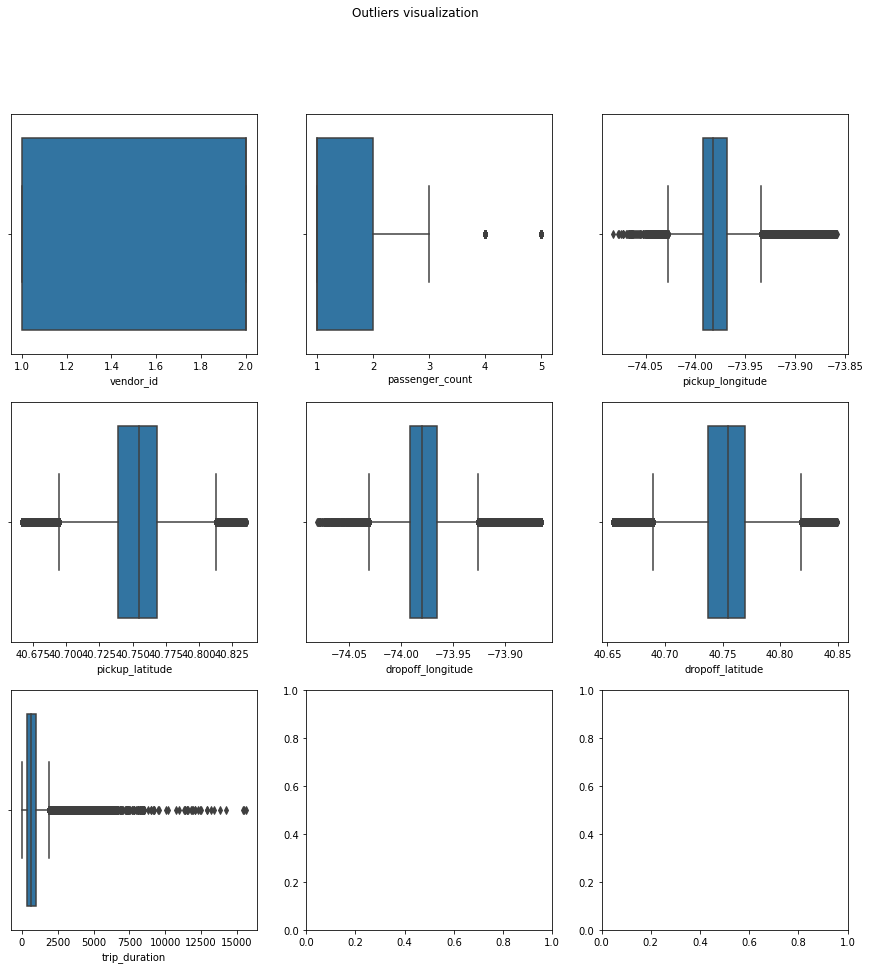

In [19]:
fig = outlier_viz(df)

In [20]:
# save data to interim
df.to_pickle('../data/interim/train.pkl')
# df.to_csv('../data/interim/train.csv')